In [1]:
using Distributions
using Random
using StatsPlots
default(fmt = :png, titlefontsize=10, legendfontsize=10, guidefontsize=10, tickfontsize=8)

function simordstat(dist, n, k; L = 10^7)
    X = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X[i] = sort!(rand!(dist, tmp[Threads.threadid()]))[k]
    end
    X
end

epmf(X, a) = count(==(a), X)/length(X)

function pmfordstat_cdf(dist, n, k, x)
    beta = Beta(k, n-k+1)
    cdf(beta, cdf(dist, x)) - cdf(beta, cdf(dist, x-1))
end

function pmfordstat_pdf1(dist, n, k, x)
    beta = Beta(k, n-k+1)
    pdf(beta, cdf(dist, x)) * pdf(dist, x)
end

function pmfordstat_pdf2(dist, n, k, x)
    beta = Beta(k, n-k+1)
    factorial(n)/(factorial(k-1)*factorial(n-k)) * cdf(dist, x)^(k-1) * pdf(dist, x) * (1 - cdf(dist, x))^(n-k)
end

name(dist::UnivariateDistribution) = replace(string(dist), r"\{.*\}"=>"")

name (generic function with 1 method)

  0.999500 seconds (609.67 k allocations: 108.630 MiB, 2.42% gc time, 27.74% compilation time)
x = 0:20 = 0:20


21×4 Matrix{Float64}:
 0.0        8.9088e-20   4.4542e-19   4.4542e-19
 0.0        1.43151e-14  6.50365e-14  6.50365e-14
 0.0        7.42102e-11  3.03355e-10  3.03355e-10
 0.0        5.16731e-8   1.87439e-7   1.87439e-7
 8.7e-6     8.48474e-6   2.67766e-5   2.67766e-5
 0.0004391  0.000436666  0.00116698   0.00116698
 0.0082919  0.00827305   0.0181004    0.0181004
 0.0637558  0.0638132    0.110027     0.110027
 0.215353   0.215181     0.281476     0.281476
 0.336102   0.335766     0.322428     0.322428
 0.254744   0.254883     0.175495     0.175495
 0.0983614  0.0986854    0.0481354    0.0481354
 0.0203927  0.0204194    0.00704999   0.00704999
 0.0023819  0.00236591   0.000583036  0.000583036
 0.0001625  0.000160754  2.86873e-5   2.86873e-5
 7.4e-6     6.69482e-6   8.80437e-7   8.80437e-7
 1.0e-7     1.78008e-7   1.75639e-8   1.75639e-8
 0.0        3.13284e-9   2.35804e-10  2.35804e-10
 0.0        3.76366e-11  2.19232e-12  2.19232e-12
 0.0        3.16747e-13  1.44462e-14  1.44462e-14
 0

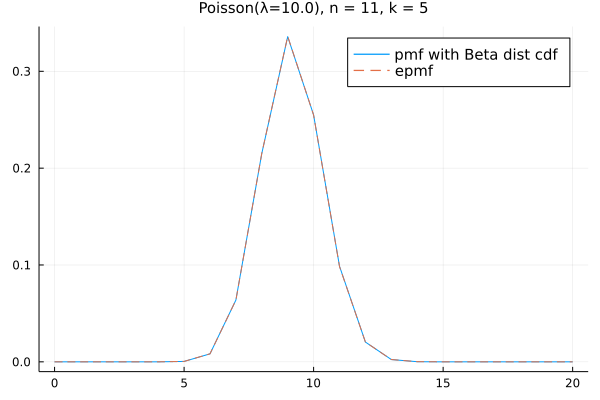

In [2]:
dist, n, k = Poisson(10), 11, 5
@time X = simordstat(dist, n, k)
@show x = 0:20
flush(stdout)

a = epmf.(Ref(X), x)
b = pmfordstat_cdf.(dist, n, k, x)
c = pmfordstat_pdf1.(dist, n, k, x)
d = pmfordstat_pdf2.(dist, n, k, x)

[a b c d] |> display
plot(x, b; label="pmf with Beta dist cdf")
plot!(x, a; label="epmf", ls=:dash)
title!(name(dist) * ", n = $n, k = $k")

  1.236424 seconds (313.36 k allocations: 93.247 MiB, 10.24% compilation time)
x = support(dist) = 0:20


21×4 Matrix{Float64}:
 0.0        4.06461e-14  2.03122e-13  2.03122e-13
 0.0        3.19128e-9   1.42163e-8   1.42163e-8
 4.9e-6     6.28329e-6   2.40674e-5   2.40674e-5
 0.0012106  0.00121662   0.003771     0.003771
 0.0385922  0.0386141    0.0883774    0.0883774
 0.261831   0.261843     0.392944     0.392944
 0.448032   0.448267     0.389554     0.389554
 0.216741   0.216474     0.0989978    0.0989978
 0.0319938  0.0319926    0.00734855   0.00734855
 0.0015662  0.00155994   0.000179027  0.000179027
 2.79e-5    2.6996e-5    1.56539e-6   1.56539e-6
 0.0        1.75775e-7   5.1647e-9    5.1647e-9
 0.0        4.43135e-10  6.47057e-12  6.47057e-12
 0.0        4.2899e-13   2.97467e-15  2.97467e-15
 0.0        2.22045e-16  4.67073e-19  4.67073e-19
 0.0        0.0          2.23529e-23  2.23529e-23
 0.0        0.0          2.73645e-28  2.73645e-28
 0.0        0.0          6.44746e-34  6.44746e-34
 0.0        0.0          1.73393e-40  1.73393e-40
 0.0        0.0          1.51522e-48  1.51522e-

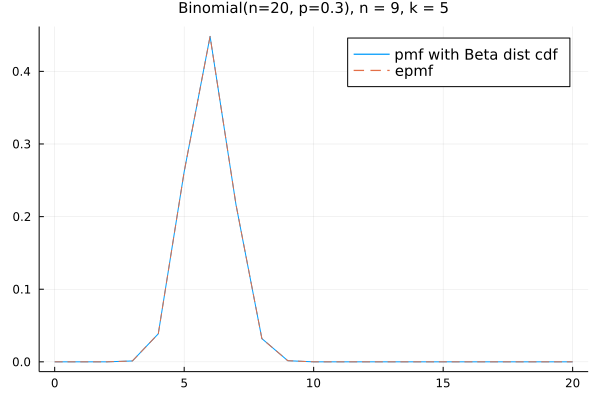

In [3]:
dist, n, k = Binomial(20, 0.3), 9, 5
@time X = simordstat(dist, n, k)
@show x = support(dist)
flush(stdout)

a = epmf.(Ref(X), x)
b = pmfordstat_cdf.(dist, n, k, x)
c = pmfordstat_pdf1.(dist, n, k, x)
d = pmfordstat_pdf2.(dist, n, k, x)

[a b c d] |> display
plot(x, b; label="pmf with Beta dist cdf")
plot!(x, a; label="epmf", ls=:dash)
title!(name(dist) * ", n = $n, k = $k")

  2.009595 seconds (140.02 k allocations: 83.926 MiB, 0.67% gc time, 2.87% compilation time)
x = support(dist) = 5:20


16×4 Matrix{Float64}:
 0.0        3.92971e-30  1.96486e-29  1.96486e-29
 0.0        1.35572e-21  6.64556e-21  6.64556e-21
 0.0        3.9418e-15   1.86976e-14  1.86976e-14
 0.0        4.38766e-10  1.97203e-9   1.97203e-9
 3.4e-6     3.38401e-6   1.38061e-5   1.38061e-5
 0.0022365  0.00222438   0.00746501   0.00746501
 0.124408   0.124358     0.274878     0.274878
 0.598827   0.599001     0.547637     0.547637
 0.265576   0.265471     0.0494539    0.0494539
 0.0089323  0.00892602   0.000188679  0.000188679
 1.64e-5    1.67543e-5   2.98545e-8   2.98545e-8
 0.0        1.46665e-9   1.76264e-13  1.76264e-13
 0.0        4.88498e-15  2.7157e-20   2.7157e-20
 0.0        0.0          4.87899e-29  4.87899e-29
 0.0        0.0          1.45945e-40  1.45945e-40
 0.0        0.0          0.0          0.0

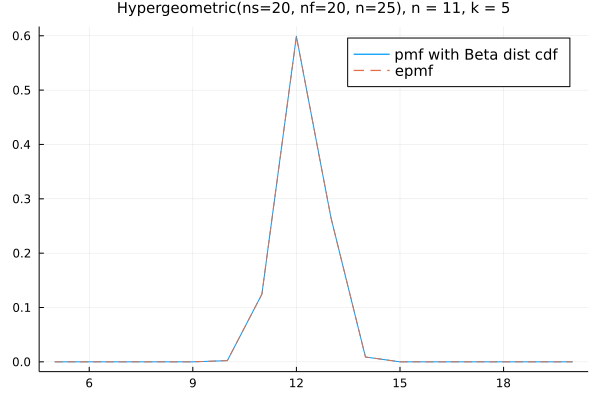

In [4]:
dist, n, k = Hypergeometric(20, 20, 25), 11, 5
@time X = simordstat(dist, n, k)
@show x = support(dist)
flush(stdout)

a = epmf.(Ref(X), x)
b = pmfordstat_cdf.(dist, n, k, x)
c = pmfordstat_pdf1.(dist, n, k, x)
d = pmfordstat_pdf2.(dist, n, k, x)

[a b c d] |> display
plot(x, b; label="pmf with Beta dist cdf")
plot!(x, a; label="epmf", ls=:dash)
title!(name(dist) * ", n = $n, k = $k")